<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 1
#### Nombre y Apellido

***
## Muestreo de señales - Fourier


<div class="alert alert-block alert-info">
<b>1)</b> Se busca realizar una librería en Python que nos permita obtener $N$ muestras de las siguientes señales de período $T_0=1/f_0$, muestreadas a una frecuencia $f_s$ :

</div>


+ **Senoidal**

> $s(k)=A_0.sin(2\pi.k.\frac{ f_0}{f_s} + \phi_0),\space\space \forall k \in \Bbb{R} \wedge k \in (0, N-1)$

+ __Ruido__ incorrelado de distribución Gaussiana y parámetros $\mu$ y $\sigma^2$

***

+ (Opcional) __Cuadrada__ con ciclo de actividad $d \in (0,1)$

> $s(k)=A_0,\space\space \forall k \in (0, N.d ]$ 

> $s(k)=-A_0,\space \forall k \in (N.d, N-1)$

+ (Opcional) __Triangular__ con punto de simetría $d \in (0,1)$ y coeficientes $a_{ij} \in \Bbb{R}$

> $s(k)=a_{11}.k/f_s+a_{12},\space\space \forall k \in (0, N.d ]$ 

> $s(k)=a_{21}.k/f_s+a_{22},\space \forall k \in (N.d, N-1)$


Es decir que se podría invocar la señal que genere la senoidal de la siguiente manera:


In [1]:
import numpy as np
import scipy.signal as scsg

def seno (fs, f0, N, a0=1, p0=0) :
    """
    brief:  Generador de señales senoidal, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la senoidal [Hz]
    a0:     amplitud pico de la señal [V]
    p0:     fase de la señal sinusoidal [rad]
    
    como resultado la señal devuelve:
    
    signal: senoidal evaluada en cada instante 
    tt:     base de tiempo de la señal
    """    
    w = 2 * np.pi * f0
    tt = np.linspace(0, (N-1)/fs, N)  
    signal = a0  * np.sin(w * tt + p0)
    return tt, signal

#%% square
    
"""
    brief:  Generador de señales cuadrada, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la senoidal [Hz]
    a0:     amplitud pico de la señal [V]
    p0:     fase de la señal sinusoidal [rad]
    dt:     ciclo de trabajo de la señal [0-1]
    como resultado la señal devuelve:
    
    signal: cuadrada evaluada en cada instante 
    tt:     base de tiempo de la señal
    """    
    
def square (fs=1000, f0=1, N=1000, a0=2, p0=0, duty=50) :
    w = 2 * np.pi * f0
    duty = duty / 100 
    tt = np.linspace(0, (N-1)/fs, N)  
    signal = a0  * scsg.square(w * tt + p0, duty )
    return tt, signal

#%% sawtooth
    
"""
    brief:  Generador de señales diente de sierra, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la senoidal [Hz]
    a0:     amplitud pico de la señal [V]
    p0:     fase de la señal sinusoidal [rad]
    width:  ancho de la señal [0-1]
    como resultado la señal devuelve:
    
    signal: iente de sierra evaluada en cada instante 
    tt:     base de tiempo de la señal
    """    
    
def sawtooth (fs=1000, f0=1, N=1000, a0=2, p0=0, width=50) :
    w = 2 * np.pi * f0
    width = width / 100 
    tt = np.linspace(0, (N-1)/fs, N)  
    signal = a0  * scsg.sawtooth(w * tt + p0, width )
    return tt, signal



a) Genere las gráficas asociadas a las siguientes señales de ejemplo para corroborar el correcto funcionamiento de las funciones. Para la presentación de las mismas, tome como referencia la presentación de la siguiente señal respecto a:

* etiquetas indicando cada eje con sus respectivas unidades
* leyendas indicando cada trazo o color qué representa
* título de la figura que explique lo que se pretende visualizar


<img src="./fig_ejemplo.svg" align="center" width="100%" /> 
<img src="./fig_ejemplo2.svg" align="center" width="70%" /> 

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Insertar aquí el código para inicializar tu notebook
########################################################


In [3]:
# NO modifiques este bloque
############################

N  = 1000 # muestras
fs = 1000 # Hz


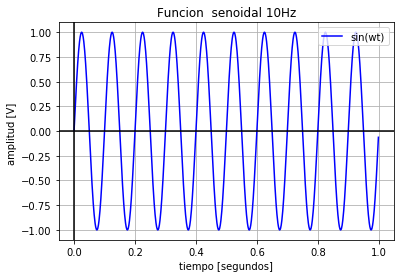

In [4]:
##################
# a.1) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = 10   # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################

tt, signal = seno(fs, f0, N, a0, p0)
plt.figure("Funcion  senoidal 10Hz")
plt.plot(tt, signal,color='blue',label='sin(wt)')
plt.xlabel('tiempo [segundos]')
plt.ylabel('amplitud [V] ')
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.grid()
plt.title('Funcion  senoidal 10Hz')
plt.legend(loc=1)
plt.show()


¿Podría inferir la frecuencia de la senoidal a.1 a partir de su representación temporal?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Sí, a partir de este gráfico puedo obtener el período de la señal. A pesar de estar normalizado como conocemos la frecuencia de muestreo y el número de muestras podemos obtener el tiempo de un período de la señal y con su inversa obtener la frecuencia de la señal. EN este caso al ser fs = 1000 cada muestra tiene una duración TS=1ms y del grafico podemos observar que la señal tiene una duración de 0,1 segundos (debido a que la frecuencia de muestreo coincide con el número de muestras). Luego obtenemos que la señal es de 10Hz. 
</div>

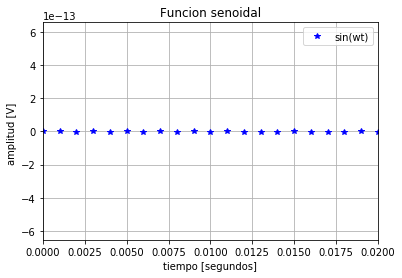

In [5]:
##################
# a.2) Senoidal #
#################
a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs/2  # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################

tt, signal = seno(fs, f0, N, a0, p0)
plt.figure("Funcion  senoidal fs/2")
plt.plot(tt, signal,'b*',label='sin(wt)')
plt.xlabel('tiempo [segundos]')
plt.ylabel('amplitud [V] ')
plt.xlim(0,0.02)
plt.grid()
plt.title('Funcion senoidal')
plt.legend(loc=1)
plt.show()


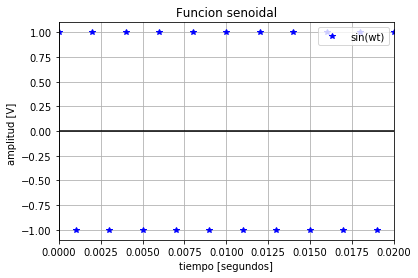

In [6]:
##################
# a.3) Senoidal #
#################

a0 = 1       # Volts
p0 = np.pi/2 # radianes
f0 = fs/2    # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################

tt, signal = seno(fs, f0, N, a0, p0)
plt.figure("Funcion  senoidal fs/2 y pi/2")
plt.plot(tt, signal,'*b',label='sin(wt)')
plt.xlabel('tiempo [segundos]')
plt.ylabel('amplitud [V] ')
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim(0,0.02)
plt.grid()
plt.title('Funcion senoidal')
plt.legend(loc=1)
plt.show()

¿Y para los casos **a.2** y **a.3** podría conocer los parámetros de la senoidal?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Estos 2 casos son mas complicados, sabiendo a priori que se trata de señales senoidales podemos obtener con el método anterior la frecuencia de la señal, sin embargo hay que ser cuidadosos con el tipo de señal, sobretodo si se interpolan las muestras ya que se veria como una señal triangular.
</div>

¿A qué se debe?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Este es un caso límite donde se esta muestreando la señal al doble de su frecuencia por lo cual solo podemos obtener 2 muestras por ciclo. En el primer caso estamos muestreando los cruces por cero de la señal. Sin embargo en el gráfico podemos observar valores aunque estos son muy pequeños, no son nulos debido a problemas computacionales al generar la señal ya que no contamos con números reales para representarla sino con números flotantes los cuales generan un pequeño error por no ser exactamente 0. En el segundo caso se ve solo valores +/-1 debido al ser una señal cosenoidal estamos muestreando simpre los valores pico de la misma.
</div>

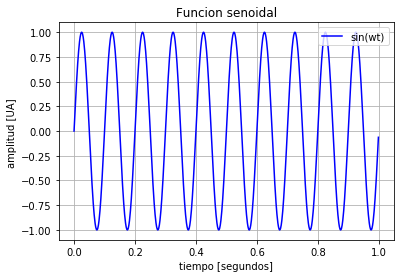

In [7]:
##################
# a.4) Senoidal #
#################

a0 = 1     # Volts
p0 = 0     # radianes
f0 = fs+10 # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################

tt, signal = seno(fs, f0, N, a0, p0)
plt.figure("Funcion  senoidal con f0=fs+10Hz")
plt.plot(tt, signal,color='blue',label='sin(wt)')
plt.xlabel('tiempo [segundos]')
plt.ylabel('amplitud [UA] ')
plt.grid()
plt.title('Funcion senoidal')
plt.legend(loc=1)
plt.show()

¿Es posible diferenciar **a.1** de **a.4** a partir de las gráficas?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Viendo la señal temporal muestreada a fs no es posible diferenciarlas ya que a muestrear la señal en puntos distintos en cada ciclo se esta representando una señal diferente a la que queremos representar. desde un punto de vista frecuencial al muestrear la señal en el tiempo la estamos haciendo periódica en el dominio de la frecuencia y al muestrearla (discretizar) nuevamente en este caso en el dominio frecuencial, trae como consecuencia hacerla periódica en el dominio temporal por lo cual se ve como una señal de 10Hz.

Desde un punto de vista matemático utilizando el ejemplo de una señalsenoidal, al ser una señal periódica el valor de $x[n]= sin (2\pi f_0nt_s) = sin (2\pi f_0nt_s+ 2\pi m)$  con m $\in \mathbb{Z}  \therefore$  operando llegamos a  $x[n]= sin (2\pi (f_0+kf_s)t_s)$ que nos indica que al muestriar a una tasa de $f_s$ mustras por segundo, si k es cualquier numero entero, no podemos distinguir entre las muestreas sampleadas a $f_0$ de otra senoidal sampleada a $f_0 + kf_s$.
</div>

¿En caso que no, qué solución podría implementar para evitar dicha ambigüedad?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Esto se podria ver en el dominio frecuencial como un aleas de la señal por ocupar mas espacio frecuencial que fs, por lo cual para poder distinguirlas tendria que limitar el acnho de banda de la señal de entrada con un filtro pasa bajos con una frecuncia de corte $f_c \leq \frac{f_s}{2}$.
</div>

<div class="alert alert-block alert-info">
<b>2.a)</b> (Opcional) Implemente un algoritmo que calcule la transformada discreta de Fourier (DFT). Utilice las funciones generadoras de señales de 1) para evaluar y ejemplificar su funcionamiento.
</div>

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> El algoritmo esta pensado para calcular primero los **Twiddle factors** y luego por medio de la multiplicación de matrices obtener la **DFT** de la señal ingresada.
</div>

In [26]:
## 2.a)  DFT    #
#################
import cmath

def myDFT (signal) :
    
    N =len(signal)
    Signal = np.empty(N)
    Signal[:N-1] = np.nan
    W = [ ]
    W = np.zeros((N,N),dtype=complex)  # tengo que limpiar la memoria, el vector
    for k in range (0, N-1):
        for n in range (0, N-1):
            W[k][n] = cmath.exp(-1j * 2 * np.pi * k * n/N)  #  calcula los twiddles factors
    Signal = np.dot(W,  signal)  #  Realiza la multiplicación punto a punto de la señal 
    return Signal


<IPython.core.display.Javascript object>


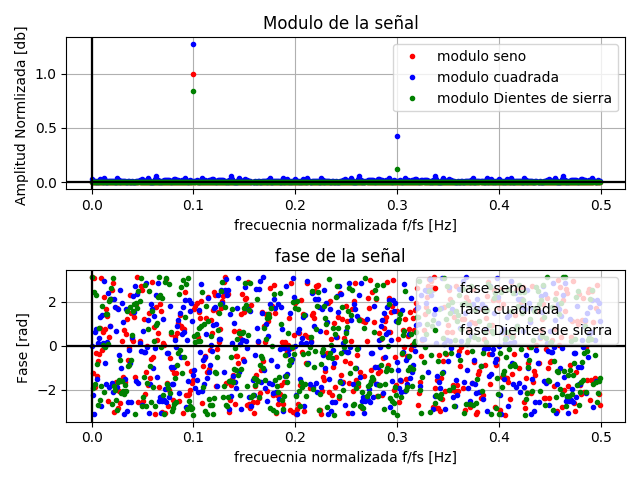

/home/nico/Documentos/facultad/6to_nivel/pds/git/pdstestbench/pdsmodulos/signals/FFT.py:50: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,1,1)
/home/nico/Documentos/facultad/6to_nivel/pds/git/pdstestbench/pdsmodulos/signals/FFT.py:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,1,2)


<IPython.core.display.Javascript object>


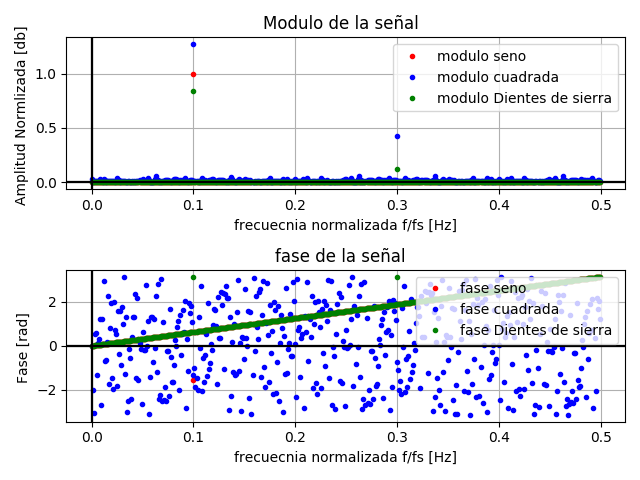

In [27]:
from pdsmodulos.signals import signals as sg
from pdsmodulos.signals import FFT

%matplotlib notebook
from ipywidgets import interact 

#%% preparo lo necesario
signal = []
signal = np.zeros((N,3),dtype='complex')
fftsignal= []
fftsignal= np.zeros((N,3),dtype='complex')
fftsignal1= []
fftsignal1= np.zeros((N,3),dtype='complex')
lsignal = ['seno', 'cuadrada', 'Dientes de sierra']


#%% genero las señales
tt,signal[:,0] = sg.seno (fs=1000, f0=100, N=1000, a0=1, p0=0,)
tt,signal[:,1] = sg.square (fs=1000, f0=100, N=1000, a0=1, p0=0, duty=50) 
tt,signal[:,2] = sg.sawtooth (fs=1000, f0=100, N=1000, a0=1, p0=0, width=50) 


#%% Grafico las señales

fftsignal[:,0] = np.fft.fft(signal[:,0])
FFT.plotFFT(fftsignal[:,0],fs,N, tp= 'FFT', c=0, db='off', l=lsignal[0])
fftsignal[:,1] = np.fft.fft(signal[:,1])
FFT.plotFFT(fftsignal[:,1],fs,N, tp= 'FFT', c=1, db='off', l=lsignal[1])
fftsignal[:,2] = np.fft.fft(signal[:,2])
FFT.plotFFT(fftsignal[:,2],fs,N, tp= 'FFT', c=2, db='off', l=lsignal[2])
plt.show()    

fftsignal1[:,0] = FFT.myDFT(signal[:,0])
FFT.plotFFT(fftsignal1[:,0],fs,N, tp= 'DFT', c=0, db='off', l=lsignal[0])
fftsignal1[:,1] = FFT.myDFT(signal[:,1])
FFT.plotFFT(fftsignal1[:,1],fs,N, tp= 'DFT', c=1, db='off', l=lsignal[1])
fftsignal1[:,2] = FFT.myDFT(signal[:,2])
FFT.plotFFT(fftsignal1[:,2],fs,N, tp= 'DFT', c=2, db='off', l=lsignal[2])  
plt.show()    

<div class="alert alert-block alert-info">
<b>2.b)</b> (Opcional) Compare el tiempo de ejecución de la DFT implementada en con la **FFT** (implementada en **scipy.signal**) en función del tamaño de la señal N. Grafique el tiempo de ejecución de ambos casos en función de N.
</div>

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Utilice el módulo **timeit** para medir el tiempo transcurrido.
</div>

In [1]:
import timeit

the_start = timeit.timeit()
print("hello")
the_end = timeit.timeit()
print(the_start - the_end)


hello
0.0004785919954883866


<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

<IPython.core.display.Javascript object>


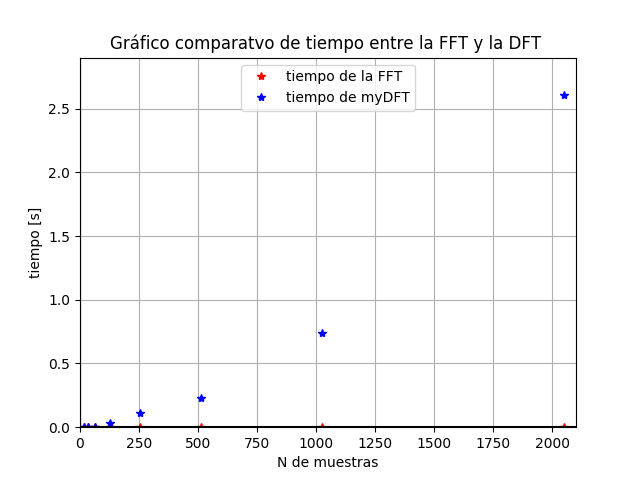

,FFT,myDFT
N,,
16,0.000033,0.000187
32,0.000018,0.000674
64,0.000013,0.002613
128,0.000011,0.033864
256,0.000011,0.115166
512,0.000015,0.228696
1024,0.000021,0.742374
2048,0.000052,2.609935
4096,0.000127,10.431856


In [2]:
%matplotlib notebook
from ipywidgets import interact 

from pandas import DataFrame
from IPython.display import HTML

import matplotlib.pyplot as plt
import numpy as np
from time import time

from pdsmodulos.signals import signals as sg 
from pdsmodulos.signals import FFT

fs = 1000 # Hz
a0 = 1 # Volts
p0 = 0 # radianes
f0 = 100 # Hz
w  = 2 * np.pi * f0


N = np.array([16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192])


tiempofft=np.zeros(10)
tiempodft=np.zeros(10)

#%% Generacion de la señal senoidal

ii = 0
while ii < 10:
    tt,signal = sg.seno (fs, f0, N[ii], a0, p0)
    the_start = time()
    np.fft.fft(signal)
    the_end = time()
    tiempofft[ii] = the_end - the_start
    ii += 1
    
#%%  calculando el tiempo de mi DFT 

ii = 0
while ii < 10:
    tt,signal = sg.seno (fs, f0, N[ii], a0, p0)
    the_start = time()
    FFT.myDFT(signal)
    the_end = time()
    tiempodft[ii] = the_end - the_start
    ii += 1 

index = ['16', '32', '64', '128', '256', '512', '1024', '2048',
          '4096', '8192']

data = {'N':index, 'FFT': tiempofft, 'myDFT':tiempodft}

df = DataFrame(data)
df.set_index('N', inplace = True)

plt.figure(u"Grafico comparatvo de tiempo entre la FFT y la DFT")
plt.plot(N, tiempofft, '*r', label='tiempo de la FFT')
plt.plot(N, tiempodft, '*b', label='tiempo de myDFT')
plt.ylabel('tiempo [s]')
plt.xlabel('N de muestras')
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.xlim((0, 2100))
plt.ylim((0, 2.9))
plt.grid()
plt.title(u"Gráfico comparatvo de tiempo entre la FFT y la DFT ")
plt.legend(loc = 'upper center')


HTML(df.to_html())


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Podemos notar tanto en el gráfico como en la tabla que los tiempos de el algoritmo de la FFT es muy chico y casi lineal, en cambio el algoritmo que implemente de la DFT tienen un crecimiento exponencial. En la tabla se puede comparar el caso de una seña con 8192 muestras la FFT demora 270 $\mu$s mientras que la DFT demora 47,59 segundos.
    
Esto se debe a todas las optimizaciónes que realiza el algoritmo aprovechando la simetría del espectro y de los **Twiddle factors**, entre otras optimizaciónes. También se optimiza el hardware que manipula los índices de los vectores.
</div> 

<div class="alert alert-block alert-info">
<b>3.a)</b> Verifique el efecto del leakage para una senoidal de $f_0 = f_S/4 + f_D$ siendo $f_D = (0.01,\, 0.25,\, 0.5)$, es decir una frecuencia de desintonía respecto al bin $f_S/4$.
</div>

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

<IPython.core.display.Javascript object>


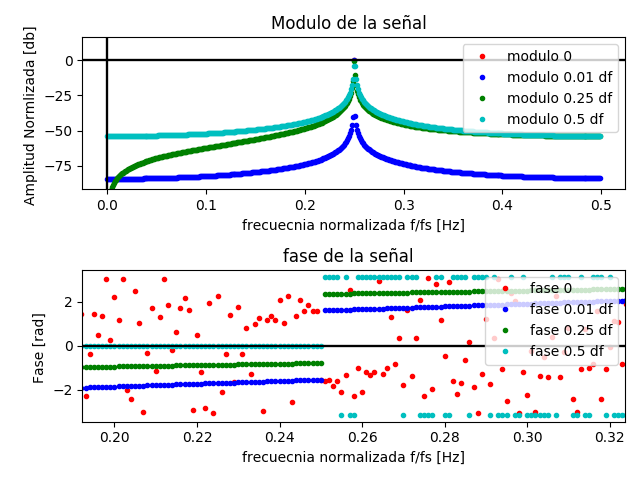

/home/nico/Documentos/facultad/6to_nivel/pds/git/pdstestbench/pdsmodulos/signals/FFT.py:50: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,1,1)
/home/nico/Documentos/facultad/6to_nivel/pds/git/pdstestbench/pdsmodulos/signals/FFT.py:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,1,2)


,Frecuencia central,Primer adyacente,Resto de frecuencias
$f_0$ \ expr. matemática,$ \lvert X(f_0) \lvert$,$ \lvert X(f_0+1) \lvert $,$\sum_{i=F} \lvert X(f_i) \lvert ^2 $
,,,$F:f \neq f_0$
$f_S/4$,0.5,1.01162e-14,0.25
$f_S/4+0.01$,0.499917,0.00505069,0.250081
$f_S/4+0.25$,0.449805,0.150406,0.297176
$f_S/4+0.5$,0.318309,0.318312,0.398679


In [3]:
%matplotlib notebook
from ipywidgets import interact, fixed

from pandas import DataFrame
from IPython.display import HTML

import matplotlib.pyplot as plt
import numpy as np

from pdsmodulos.signals import signals as sg 
from pdsmodulos.signals import FFT

#%% Estalesco los datos necesarios
N  = 1000 # muestras
fs = 1000 # Hz
df = fs / N
a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs / 4 # Hz

fd  = np.array([0, 0.01*df, 0.25*df, 0.5*df],float)
fd1 = np.array(['0', '0.01 df', '0.25 df', '0.5 df'])
f   = f0 + fd
del fd

signal    = np.zeros((N, 4))
fftsignal = np.zeros((N, 4), complex)
modfftsignal = np.zeros((N, 4), float)
fasefftsignal = np.zeros((N, 4), float)
energia = np.zeros((4))
#%% generacion y muestreo de las senoidal

for ii in range(0, 4):
    tt, signal[:,ii] = sg.seno(fs, f[ii], N, a0, p0)

#%% Gŕaficos de las señales frecuenciales

for ii in range(0, 4) : # no incluye el 4
    fftsignal[:,ii] = np.fft.fft(signal[:,ii])
    FFT.plotFFT(fftsignal[:,ii],fs,N, tp= 'FFT', c=ii, l=fd1[ii], db='on', m='.', ls='None')

#%% obtengo los datos del módulo para las tablas
for ii in range(0, 4) :
     modfftsignal[:, ii] = np.abs(fftsignal[:, ii])
     
     
for ii in range(0,4) :
     for jj in range(0,N) :
        if jj != f0 :
            energia[ii] += modfftsignal[jj,ii]**2
                
energia = energia / (N**2)   


tus_resultados = [ ['$ \lvert X(f_0) \lvert$', '$ \lvert X(f_0+1) \lvert $', '$\sum_{i=F} \lvert X(f_i) \lvert ^2 $'], 
                   ['',                        '',                           '$F:f \neq f_0$'], 
                  [modfftsignal[250,0]/N, modfftsignal[251,0]/N, energia[0]], # <-- acá debería haber numeritos :)
                  [modfftsignal[250,1]/N, modfftsignal[251,1]/N, energia[1]], # <-- acá debería haber numeritos :)
                  [modfftsignal[250,2]/N, modfftsignal[251,2]/N, energia[2]], # <-- acá debería haber numeritos :)
                  [modfftsignal[250,3]/N, modfftsignal[251,3]/N, energia[3]]  # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['Frecuencia central', 'Primer adyacente', 'Resto de frecuencias'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '$f_S/4$', 
                      '$f_S/4+0.01$', 
                      '$f_S/4+0.25$', 
                      '$f_S/4+0.5$'])
HTML(df.to_html())

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> A partir de los gráficos podemos notar que a medida que la señal esta mas desintonizada hay un mayor desparramo de la energía en los demás bins, lo cual es lógico ya que como no esta perfectamente sintonizada esta se proyecta en todas las frecuencias. Podemos ver matemáticamente esto utilizando la fórmula $f_{análisis}=\frac{m.f_S}{N}$ con $m \in R$ que solo encuentra una frecuencia si es un multiplo entero de $f_s$ en cualquier otro caso habra un desparramo de la energía.
    
En la tabla podemos notar lo mismo ya que a medida que se desintoniza el bin correspondiente tienen un módulo menor y el bid adyacente tiene un módulo mayor. Finalmente en la tercer columna vamos que la energía en el resto de los bins aumenta.  
</div>

<div class="alert alert-block alert-info">
<b>3.b)</b> Verifique qué ocurre si a la señal de $f_0 = f_S/4 + 0.5$ se le agregan ceros para prolongar su duración. Es decir si la señal tiene N muestras, agregue $M_j$ ceros siendo $M_j = ( \frac{N}{10},\, N,\, 10N)$.
</div>

<IPython.core.display.Javascript object>


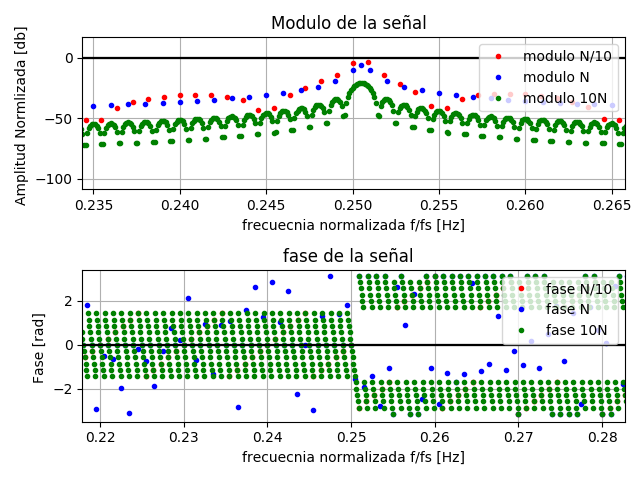

0

In [4]:
%matplotlib notebook
from ipywidgets import interact, fixed

import matplotlib.pyplot as plt
import numpy as np

from pdsmodulos.signals import signals as sg 
from pdsmodulos.signals import FFT

#%% Estalesco los datos necesarios
N  = 1000 # muestras
fs = 1000 # Hz
df = fs / N
a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs / 4 + 0.5*df# Hz

#%% Genero las variables necesarias

M = [N/10, N,10*N]
fd1 = np.array(['N/10', 'N', '10N'])

signal     = np.zeros((N))

fftpadding01 = np.zeros(int(M[0]) + N, complex)
fftpadding1  = np.zeros(int(M[1]) + N, complex)
fftpadding10 = np.zeros(int(M[2]) + N, complex)

signal_padding01 = np.zeros(int(M[0]) + N, float)
signal_padding1  = np.zeros(int(M[1]) + N, float)
signal_padding10 = np.zeros(int(M[2]) + N, float)

aux_padding01 = np.zeros(int(M[0]), float)
aux_padding1  = np.zeros(int(M[1]), float)
aux_padding10 = np.zeros(int(M[2]), float)
#%% generacion y muestreo de las senoidal

tt, signal = sg.seno(fs, f0, N, a0, p0)
  
#%% concateno los ceros
signal_padding01 = np.concatenate((signal, aux_padding01), axis=0) 
signal_padding1  = np.concatenate((signal, aux_padding1), axis=0) 
signal_padding10 = np.concatenate((signal, aux_padding10), axis=0) 

del aux_padding01
del aux_padding1
del aux_padding10

#%% Gŕaficos de las señales frecuenciales
fftpadding01 = np.fft.fft(signal_padding01)
FFT.plotFFT(fftpadding01,fs,M, tp= 'FFT', c=0, l=fd1[0], db='on', m='.')

fftpadding1 = np.fft.fft(signal_padding1)
FFT.plotFFT(fftpadding1 ,fs,M, tp= 'FFT', c=1, l=fd1[1], db='on', m='.')

fftpadding10 = np.fft.fft(signal_padding10)
FFT.plotFFT(fftpadding10,fs,M, tp= 'FFT', c=2, l=fd1[2], db='on', m='.')

**3.c)** ¿Ha variado la resolución espectral en los casos de 3.b?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La respuesta es no, al agregar muestras estamos muestreando con una ventana rectangular.
    
Explicando esto con un poco mas de detalle podemos pensarla como una funcion cuadrada que vale 1 las primeras N muestras y cero las siguientes M muestras. Al muestrear lo que estamos haciendo es multiplicar nuestra señal a transformar con esta función cuadrada, por lo tanto en el domino de Fourier tenemos una convolución entre ambas señales transformadas. Siendo la transformada de la señal cuadrada la función $sinc(x)$ que podemos ver que aparece. Dependiendo del valor de N y M va ser la cantidad de muestras que duren los lóbulos de la $sinc(x)$ y sus cruces por cero. Los cruces por cero están dados por la siguiente formula: $m = \frac{N}{K}$ donde N es el número total de muestras y K la cantidad de muestras que la ventana tiene en 1. Se puede observar que mientras menos muestras estén en 1 el lóbulo es mas grande y se observa mejor la $sinc(x)$. 

En definitiva lo que se logra es interpolar con una función $sinc(x)$ las muestras de nuestra señal.
</div>

**3.d)** ¿Cuál es el efecto que se produce en cada caso? Esta técnica se conoce como Zero padding.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Lo que podemos notar es que en cada caso los cruces por cero de la $sinc(x)$ cambia por el valor de $\Delta f$. Esta técnica nos permite tener mas precisión al medir los picos de nuestra señal.
</div>

**3.e)** Analice cuál es la frecuencia  $\hat{f}_0 = \mathop{arg\ max}_f \{\lvert X(f) \rvert \}$ a la que ocurre el máximo del espectro y en cuánto difiere de $f_0$ en términos porcentuales.

In [5]:
#%% Estalesco los datos necesarios
N  = 1000 # muestras
fs = 1000 # Hz
df = fs / N
a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs / 4 + 0.5*df# Hz

#%% Genero las variables necesarias

M = [N, N/10, N,10*N]
fd1 = np.array(['N', 'N/10', 'N', '10N'])

signal = np.zeros((N))

fftsignal    = np.zeros(int(M[0]), complex)
fftpadding01 = np.zeros(int(M[1]) + N, complex)
fftpadding1  = np.zeros(int(M[2]) + N, complex)
fftpadding10 = np.zeros(int(M[3]) + N, complex)

signal_padding01 = np.zeros(int(M[1]) + N, float)
signal_padding1  = np.zeros(int(M[2]) + N, float)
signal_padding10 = np.zeros(int(M[3]) + N, float)

aux_padding01 = np.zeros(int(M[1]), float)
aux_padding1  = np.zeros(int(M[2]), float)
aux_padding10 = np.zeros(int(M[3]), float)


#%% generacion y muestreo de las senoidal

tt, signal = sg.seno(fs, f0, N, a0, p0)
  
#%% concateno los ceros
signal_padding01 = np.concatenate((signal, aux_padding01), axis=0) 
signal_padding1  = np.concatenate((signal, aux_padding1), axis=0) 
signal_padding10 = np.concatenate((signal, aux_padding10), axis=0) 

del aux_padding01
del aux_padding1
del aux_padding10

#%% Gŕaficos de las señales frecuenciales
fftsignal    = np.fft.fft(signal)
fftpadding01 = np.fft.fft(signal_padding01)
fftpadding1  = np.fft.fft(signal_padding1)
fftpadding10 = np.fft.fft(signal_padding10)


#%% prueba de los estadisticos
# en primer lugar realizo la prueba de maximizar el modulo de cada señal sin padding y obtengo los índices de losmaximos para cada experimento

f_signal   = 0
mod_signal = np.zeros(int((M[1]+N)/2))
mod_signal = abs(fftsignal[:int((M[1]+N)/2)])*2/(M[1] + N)
max_signal = np.amax(mod_signal, axis=0)

for ii in range(0, int((M[1]+N)/2)) :
     if (max_signal == mod_signal[ii]) :
        f_signal = ii
      
          
f_padding01   = 0
mod_padding01 = np.zeros(int((M[1]+N)/2))
mod_padding01 = abs(fftpadding01[:int((M[1]+N)/2)])*2/(M[1] + N)
max_padding01 = np.amax(mod_padding01, axis=0)

for ii in range(0, int((M[1]+N)/2)) :
     if (max_padding01 == mod_padding01[ii]) :
        f_padding01 = ii *10/11



f_padding1   = 0
mod_padding1 = np.zeros(int((M[2]+N)/2))
mod_padding1 = abs(fftpadding1[:int((M[2]+N)/2)])*2/(M[2] + N)
max_padding1 = np.amax(mod_padding1, axis=0)

for ii in range(0, int((M[2]+N)/2)) :
     if (max_padding1 == mod_padding1[ii]) :
        f_padding1 = ii / 2
        
          
f_padding10   = 0
mod_padding10 = np.zeros(int((M[3]+N)/2))
mod_padding10 = abs(fftpadding10[:int((M[3]+N)/2)])*2/(M[3] + N)
max_padding10 = np.amax(mod_padding10, axis=0)

for ii in range(0, int((M[3]+N)/2)) :
     if (max_padding10 == mod_padding10[ii]) :
        f_padding10 = ii / 11  
        
          
error_signal    = abs((f0 - f_signal)/f0) * 100
error_padding01 = abs((f0 - f_padding01)/f0) * 100  
error_padding1  = abs((f0 - f_padding1)/f0) * 100   
error_padding10 = abs((f0 - f_padding10)/f0) * 100   



tus_resultados = [error_signal, # <-- acá debería haber numeritos :)
                  error_padding01, # <-- acá debería haber numeritos :)
                  error_padding1, # <-- acá debería haber numeritos :)
                  error_padding10 # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$e_\%$'],
               index=['0',
                      '$N/10$', 
                      '$N$', 
                      '$10N$'])
HTML(df.to_html())


,$e_\%$
0,0.199601
$N/10$,0.163310
$N$,0.000000
$10N$,0.018146


<div class="alert alert-block alert-info">
<b>4)</b> 
Para cada señal propuesta complete los valores que se indican en las siguientes consignas.
</div>

+ En la tabla de resultados de cada inciso, en la fila indicada con **predicción** responda conceptualmente qué contenido espectral debería obtener tras evaluar su FFT (sin realizar ninguna simulación).
+ Calcule su espectro y discuta la predicción con los resultados obtenidos de la **simulación**. Intente discutir las diferencias si las hubiera en las respuestas de cada inciso.
+ Preste especial atención en su discusión a:
  * La energía total de la señal
  * La energía del tono en particular
  * La localización del tono en el espectro
+ Siga las indicaciones particulares para cada señal.


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Las siguientes señales pueden generarse a partir de una senoidal *patrón* siguiendo las consignas de la derecha. 
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./1.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.a) Senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Debería tener una delta de kronecker ya que es un tono senoidal píro múltiplo entero de $\Delta$f, por lo cual no debería haber ningun desparramo. Al ser na señal senoidal de amplitud unitaria su energía debería ser 0,5. El valor de la energía en $f_0$ y la energía máxima también deberían ser 0,5.
</div>

<IPython.core.display.Javascript object>


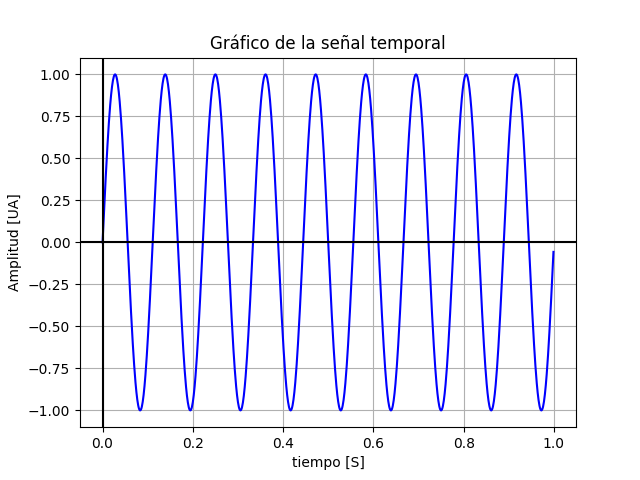

<IPython.core.display.Javascript object>


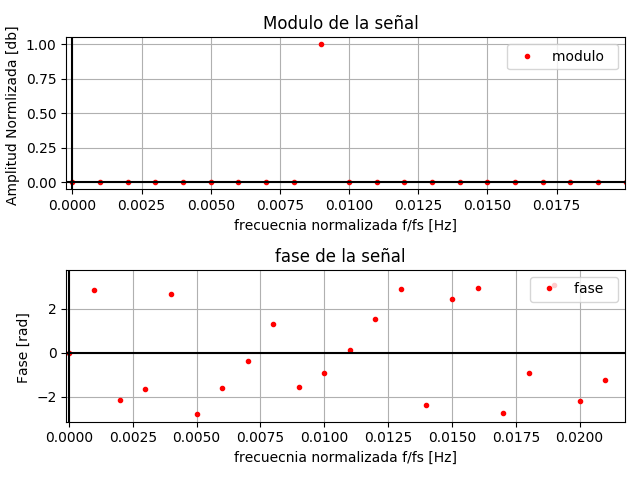

la frecuencia estimada es:  9


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.5,"0,5","0,5"
,,,
simulación,0.5,0.5,0.5


In [10]:

#%% importo los paquetes necesarios

%matplotlib notebook
from ipywidgets import interact, fixed

import os
import matplotlib.pyplot as plt
import numpy as np

from pdsmodulos.signals import signals as sg 
from pdsmodulos.signals import FFT

#%% limpio el entorno
os.system ("clear") # limpia la terminal de python
plt.close("all")    #cierra todos los graficos 

#%% Estalesco los datos necesarios
N  = 1000 # muestras
fs = 1000 # Hz
df = fs / N
a0 = 1 # Volts
p0 = 0 # radianes
f0 = 9*df# Hz

#%% Genero las variables necesarias

signal    = np.zeros(N)
fftsignal = np.zeros(N, complex)

energia_temporal = 0
energia_frecuencia = 0
energia_frecuencia_puntual = 0
energia_max_frecuencia = 0
#%% generacion y muestreo de las senoidal

tt, signal = sg.seno(fs, f0, N, a0, p0)
fftsignal    = np.fft.fft(signal)
mod_fftsignal = np.abs(fftsignal)

#%% Gŕaficos de las señales en tiempo y en frecuenciales
plt.figure("Gráfico de la señal temporal")
plt.plot(tt, signal, 'b')
plt.xlabel('tiempo [S]')
plt.ylabel('Amplitud [UA]')
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.grid()
plt.title('Gráfico de la señal temporal')

FFT.plotFFT(fftsignal, fs, N, y1l='Amplitud [UA] ', y2l='Fase [rad] ',
             c=0, db='off', tipo='plot', m='.')


#%%  Cálculo de la energía

# energía temporal
for ii in range(0,N):
     energia_temporal += signal[ii]**2

energia_temporal /= N

#energia frecuencial
for ii in range(0,N):
    energia_frecuencia += mod_fftsignal[ii]**2
     
energia_frecuencia = energia_frecuencia/N**2


# Energía puntual
mod_fftsignal1 = np.zeros(int(N/2))
mod_fftsignal1 = mod_fftsignal[:int(N/2)]

max_signal = np.amax(mod_fftsignal1, axis=0)


for jj in range(0, int(N/2)) :
     if (max_signal == mod_fftsignal1[jj]) :
          k = jj
          
print('la frecuencia estimada es: ', k)


energia_frecuencia_puntual = mod_fftsignal1[9] **2
energia_frecuencia_puntual = energia_frecuencia_puntual *2/(N**2)

energia_max_frecuencia = max_signal **2
energia_max_frecuencia = energia_max_frecuencia *2/(N**2)

#%% Relleno de tabla 

prediccion = ['0.5', '0,5', '0,5']
resultados = [energia_frecuencia, energia_frecuencia_puntual, energia_max_frecuencia]

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [prediccion[0], prediccion[1], prediccion[2]], # <-- completar acá
                  ['', '', ''], 
                  [resultados[0], resultados[1], resultados[2]]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./2.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.b) **1 solo ciclo** de la misma senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En este caso la señal es un solo ciclo de un tono senoidal y todo lo demás cero por lo tanto tiene menor energía y además como tengo una ventana de muestreo rectangular mi señal en frecuencia es la convolución de una delta de kronecker con una sic(x), lo que produce una interpolación de las muestras. La enérgia va estar mas concentrada en la frecuenca 9$\Delta$f pero a diferencia del caso anterior todas las frecuencias van a tener energía. 
</div>

<IPython.core.display.Javascript object>


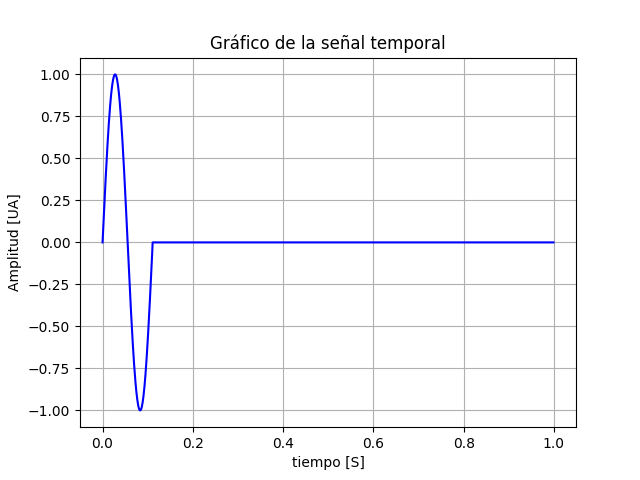

<IPython.core.display.Javascript object>


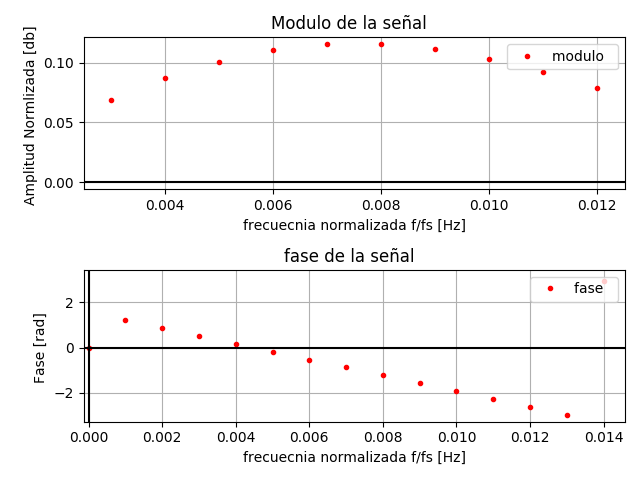

la frecuencia estimada es:  8


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.055 (Cálculo en tiempo),"<0,05","<0,05"
,,,
simulación,0.0555555,0.00664283,0.00664283


In [36]:
#%% importo los paquetes necesarios
import os
import matplotlib.pyplot as plt
import numpy as np

from pandas import DataFrame
from IPython.display import HTML

from pdsmodulos.signals import signals as sg 
from pdsmodulos.signals import FFT

#%% limpio el entorno
os.system ("clear") # limpia la terminal de python
plt.close("all")    #cierra todos los graficos 

#%% Estalesco los datos necesarios
N  = 1000 # muestras
fs = 1000 # Hz
df = fs / N
a0 = 1 # Volts
p0 = 0 # radianes
f0 = 9*df# Hz

#%% Genero las variables necesarias

signal    = np.zeros(N)
fftsignal = np.zeros(N, complex)

energia_temporal = 0
energia_frecuencia = 0
energia_frecuencia_puntual = 0
energia_max_frecuencia = 0
#%% generacion y muestreo de las senoidal
N0= round((1/f0)*1000)
tt, aux_signal = sg.seno(fs, f0, N0, a0, p0)

aux = np.zeros(N-N0)
signal = np.concatenate((aux_signal, aux), axis=0) 

del tt, aux, aux_signal

tt = np.linspace(0, (N-1)/fs, N)
fftsignal    = np.fft.fft(signal)
mod_fftsignal = np.abs(fftsignal)


#%% Gŕaficos de las señales en tiempo y en frecuenciales
plt.figure("Gráfico de la señal temporal")
plt.plot(tt, signal, 'b')
plt.xlabel('tiempo [S]')
plt.ylabel('Amplitud [UA]')
plt.grid()
plt.title('Gráfico de la señal temporal')


FFT.plotFFT(fftsignal, fs, N, y1l='Amplitud [UA] ', y2l='Fase [rad] ',
              c=0, db='off', tipo='plot', m='.')

#%%  Cálculo de la energía

# energía temporal
for ii in range(0,N):
     energia_temporal += signal[ii]**2

energia_temporal /= N

#energia frecuencial
for ii in range(0,N):
    energia_frecuencia += mod_fftsignal[ii]**2
     
energia_frecuencia = energia_frecuencia/N**2


# Energía puntual
mod_fftsignal1 = np.zeros(int(N/2))
mod_fftsignal1 = mod_fftsignal[:int(N/2)]

max_signal = np.amax(mod_fftsignal1, axis=0)


for jj in range(0, int(N/2)) :
     if (max_signal == mod_fftsignal1[jj]) :
        k = jj
print('la frecuencia estimada es: ', k)          


energia_frecuencia_puntual = mod_fftsignal1[k] **2
energia_frecuencia_puntual = energia_frecuencia_puntual *2/(N**2)

energia_max_frecuencia = max_signal **2
energia_max_frecuencia = energia_max_frecuencia *2/(N**2)


#%% Relleno de tabla 

prediccion = ['0.055 (Cálculo en tiempo)', '<0,05', '<0,05']
resultados = [energia_frecuencia, energia_frecuencia_puntual, energia_max_frecuencia]

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [prediccion[0], prediccion[1], prediccion[2]], # <-- completar acá
                  ['', '', ''], 
                  [resultados[0], resultados[1], resultados[2]]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


Observe el resultado y compare sus resultados con el punto anterior. ¿Qué ha cambiado? ¿Cuánto vale la energía de un solo ciclo de senoidal respecto al caso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Como mencione anteriormente la energía total de la señale es menor por tener un solo ciclo de la señal senoidal en la ventana de muestreo (se mantiene el tamaño de la ventana pero se reduce el tamaño de la señal muestreada, es como hacer un zero-padding). Si dividimos la energía de la señal anterior 0,5 por el número de ciclos de la señal muestreada (9) nos da el valor de la energía por ciclo que es igual a 0,055 como demuestra este ejemplo. Por otro lado vemos que al querer estimar la energía puntual de la señal, el resultado es bastante malo por todo el desparramo ocurrido. El valor obtenido corresponde solo al 1,2% de la energía real de la seña.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./3.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.c) 1 solo ciclo de la misma senoidal
				de energía normalizada y frecuencia $f_0 = 9 \cdot f_S/N$ **pero demorado un tiempo igual a dos ciclos**. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<IPython.core.display.Javascript object>


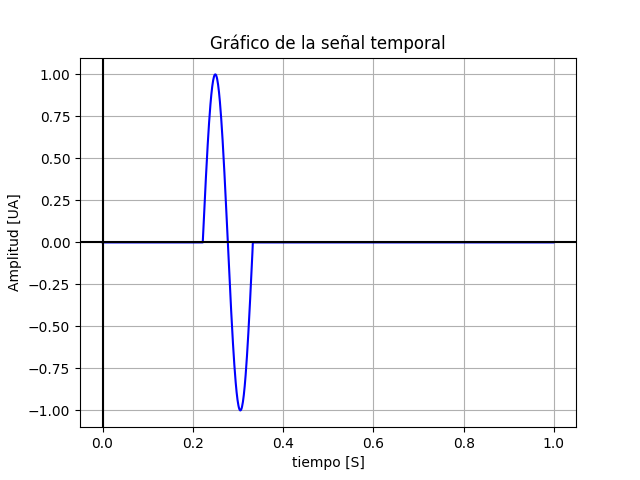

<IPython.core.display.Javascript object>


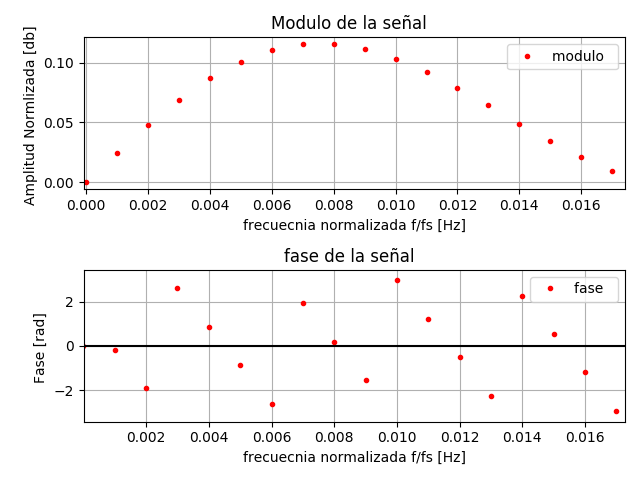

la frecuencia estimada es:  8


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.055 (Cálculo en tiempo),0.00664283 (por la simulación anterior),0.00664283(por la simulación anterior)
,,,
simulación,0.0555555,0.00664283,0.00664283


In [3]:
#%% importo los paquetes necesarios
import os
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook
from ipywidgets import interact, fixed

from pandas import DataFrame
from IPython.display import HTML

from pdsmodulos.signals import signals as sg 
from pdsmodulos.signals import FFT

#%% limpio el entorno
os.system ("clear") # limpia la terminal de python
plt.close("all")    #cierra todos los graficos 

#%% Estalesco los datos necesarios
N  = 1000 # muestras
fs = 1000 # Hz
df = fs / N
a0 = 1 # Volts
p0 = 0 # radianes
f0 = 9*df# Hz

#%% Genero las variables necesarias

signal    = np.zeros(N)
fftsignal = np.zeros(N, complex)

energia_temporal = 0
energia_frecuencia = 0
energia_frecuencia_puntual = 0
energia_max_frecuencia = 0

#%% generacion y muestreo de las senoidal
N0= round((1/f0)*1000)
tt, aux_signal = sg.seno(fs, f0, N0, a0, p0)

aux  = np.zeros(2*N0)
aux2 = np.zeros((N-3*N0))
aux3 = np.concatenate((aux,aux_signal), axis=0) 
signal = np.concatenate((aux3 ,aux2), axis=0) 

del tt, aux, aux2, aux3, aux_signal

tt = np.linspace(0, (N-1)/fs, N)
fftsignal    = np.fft.fft(signal)
mod_fftsignal = np.abs(fftsignal)


#%% Gŕaficos de las señales en tiempo y en frecuenciales
plt.figure("Gráfico de la señal temporal")
plt.plot(tt, signal, 'b')
plt.xlabel('tiempo [S]')
plt.ylabel('Amplitud [UA]')
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.grid()
plt.title('Gráfico de la señal temporal')


FFT.plotFFT(fftsignal, fs, N, y1l='Amplitud [UA] ', y2l='Fase [rad] ',
              c=0, db='off', tipo='plot', m='.', col_ax='off')

#%%  Cálculo de la energía

# energía temporal
for ii in range(0,N):
     energia_temporal += signal[ii]**2

energia_temporal /= N

#energia frecuencial
for ii in range(0,N):
    energia_frecuencia += mod_fftsignal[ii]**2
     
energia_frecuencia = energia_frecuencia/N**2


# Energía puntual
mod_fftsignal1 = np.zeros(int(N/2))
mod_fftsignal1 = mod_fftsignal[:int(N/2)]

max_signal = np.amax(mod_fftsignal1, axis=0)


for jj in range(0, int(N/2)) :
     if (max_signal == mod_fftsignal1[jj]) :
        k = jj
print('la frecuencia estimada es: ', k)


energia_frecuencia_puntual = mod_fftsignal1[k] **2
energia_frecuencia_puntual = energia_frecuencia_puntual *2/(N**2)

energia_max_frecuencia = max_signal **2
energia_max_frecuencia = energia_max_frecuencia *2/(N**2)


#%% Relleno de tabla 

prediccion = ['0.055 (Cálculo en tiempo)', '0.00664283 (por la simulación anterior)', '0.00664283(por la simulación anterior)']
resultados = [energia_frecuencia, energia_frecuencia_puntual, energia_max_frecuencia]

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [prediccion[0], prediccion[1], prediccion[2]], # <-- completar acá
                  ['', '', ''], 
                  [resultados[0], resultados[1], resultados[2]]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())

En este caso, ¿Qué ha cambiado respecto al anterior? ¿Cómo se manifiesta en el dominio frecuencial?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Esta es la misma señal que el caso anterior pero desplazada en tiempo por lo cual en frecuencia vamos a tener el mismo módulo pero con un cambio de fase.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./4.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.d) 1 solo ciclo de la misma senoidal utilizada hasta ahora, y otro ciclo de idénticas características pero de $f_1 = 8 \cdot f_S/N$ y demorado aproximadamente como se observa a la izquierda. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Podemos esperar que halla dos picos, uno en 8 Hz y otro en 9Hz interpoladas por una señal sinc(x). La energía de esta señal debería ser superior que el caso anterior por contener dos tonos senoidales. Sin embargo no estoy seguro que se puedan distinguir las señales por ser tonos muy cercanos interpolados por una sinc, la sinc podria aplanar los picos y no permitir distinguirlos.
</div>

<IPython.core.display.Javascript object>


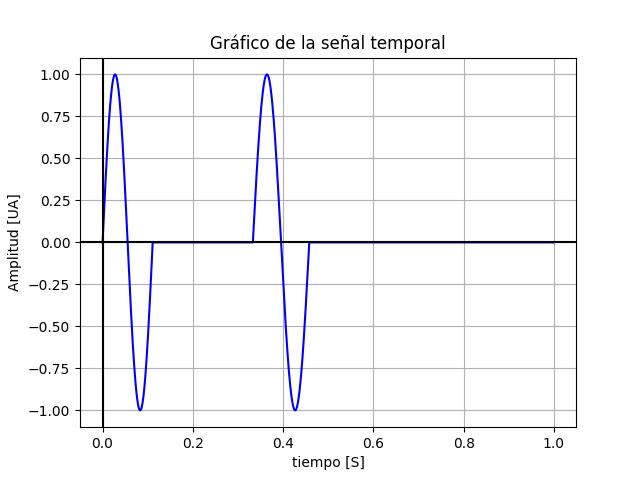

<IPython.core.display.Javascript object>


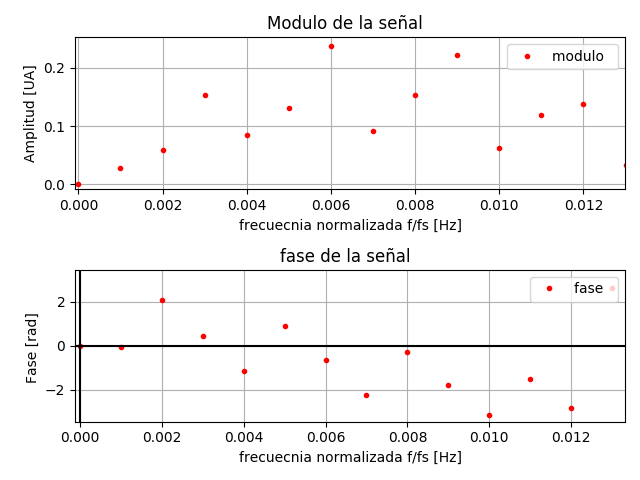

la energía estimada puntual 9 es:  0.024604454941280034
la energía estimada puntual 8 es:  0.011716841713223463
la energía estimada maxima es:  0.028086036897469656


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,"0,118 (Cálculo en tiempo)",energía en 9Hz,
,,,
simulación,0.118055,0.0246045,0.028086


In [4]:
#%% importo los paquetes necesarios
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib notebook
from ipywidgets import interact, fixed

from pandas import DataFrame
from IPython.display import HTML

from pdsmodulos.signals import signals as sg 
from pdsmodulos.signals import FFT

#%% limpio el entorno
os.system ("clear") # limpia la terminal de python
plt.close("all")    #cierra todos los graficos 

#%% Estalesco lcambioos datos necesarios
N  = 1000 # muestras
fs = 1000 # Hz
df = fs / N
a0 = 1 # Volts
p0 = 0 # radianes
f0 = 9*df # Hz
f1 = 8*df # Hz

#%% Genero las variables necesarias

signal    = np.zeros(N)
fftsignal = np.zeros(N, complex)

energia_temporal = 0
energia_frecuencia = 0
energia_frecuencia_puntual = 0
energia_max_frecuencia = 0


#%% generacion y muestreo de las senoidal
N0 = round((1/f0)*1000)
N1 = round((1/f1)*1000)
tt, aux_signal1 = sg.seno(fs, f0, N0, a0, p0)
tt, aux_signal2 = sg.seno(fs, f1, N1, a0, p0)

aux  = np.zeros(2*N0)
aux2 = np.zeros((N - 3*N0 - N1))
aux3 = np.concatenate((aux_signal1, aux), axis=0) 
aux_signal = np.concatenate((aux3 ,aux_signal2), axis=0) 
signal = np.concatenate((aux_signal, aux2), axis=0) 

del tt, aux, aux2, aux3, aux_signal, aux_signal1,aux_signal2

tt = np.linspace(0, (N-1)/fs, N)

fftsignal    = np.fft.fft(signal)
mod_fftsignal = np.abs(fftsignal)

#%% Gŕaficos de las señales en tiempo y en frecuenciales
plt.figure("Gráfico de la señal temporal")
plt.plot(tt, signal, 'b')
plt.xlabel('tiempo [S]')
plt.ylabel('Amplitud [UA]')
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.grid()
plt.title('Gráfico de la señal temporal')


FFT.plotFFT(fftsignal, fs, N, y1l='Amplitud [UA]', y2l='Fase [rad] ',
              c=0, db='off', tipo='plot', m='.', col_ax='off')

#%%  Cálculo de la energía

# energía temporal
for ii in range(0,N):
     energia_temporal += signal[ii]**2

energia_temporal /= N

#energia frecuencial
for ii in range(0,N):
    energia_frecuencia += mod_fftsignal[ii]**2
     
energia_frecuencia = energia_frecuencia/N**2


# Energía puntual
mod_fftsignal1 = np.zeros(int(N/2))
mod_fftsignal1 = mod_fftsignal[:int(N/2)]

max_signal = np.amax(mod_fftsignal1, axis=0)


for jj in range(0, int(N/2)) :
     if (max_signal == mod_fftsignal1[jj]) :
        k = jj
          

energia_frecuencia_puntual9 = mod_fftsignal1[9] **2
energia_frecuencia_puntual9 = energia_frecuencia_puntual9 *2/(N**2)

energia_frecuencia_puntual8 = mod_fftsignal1[8] **2
energia_frecuencia_puntual8 = energia_frecuencia_puntual8 *2/(N**2)
print('la energía estimada puntual 9 es: ', energia_frecuencia_puntual9)
print('la energía estimada puntual 8 es: ', energia_frecuencia_puntual8)

energia_max_frecuencia = max_signal **2
energia_max_frecuencia = energia_max_frecuencia *2/(N**2)
print('la energía estimada maxima es: ', energia_max_frecuencia)

#%% Relleno de tabla 

prediccion = [' 0,118 (Cálculo en tiempo)', 'energía en 9Hz', '']
resultados = [energia_frecuencia, energia_frecuencia_puntual9, energia_max_frecuencia]

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [prediccion[0], prediccion[1], prediccion[2]], # <-- completar acá
                  ['', '', ''], 
                  [resultados[0], resultados[1], resultados[2]]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])

HTML(df.to_html())


¿Puede localizar ambas componentes en este espectro? ¿Cómo lo haría?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Es dificil, se pueden indentificar 2 picos pero estos no coinciden con ambas señales, al graficarlas podemos notar 2 picos separados, uno en 9 Hz y otro mayor en 6Hz. Podría aplicar una ventana Blackman-Harris o quizas tomar mas muestras para tener mayor resolución espectral.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./5.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.e) Idéntico al caso anterior salvo que se invierte la ocurrencia de las señales. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<IPython.core.display.Javascript object>


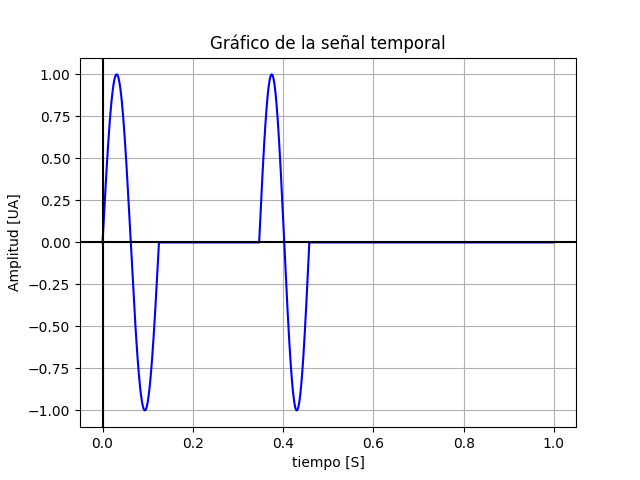

<IPython.core.display.Javascript object>


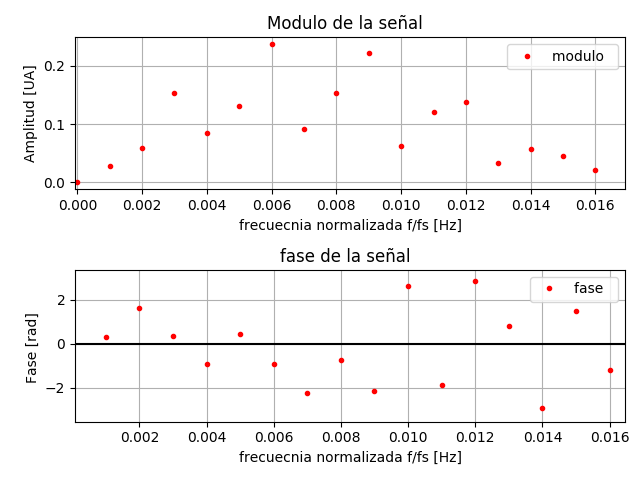

la energía estimada puntual 9 es:  0.02457557853116237
la energía estimada puntual 8 es:  0.011794286519149853
la energía estimada maxima es:  0.028071485057223563


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,"0,118",energía en 9Hz = 0.0246045,0.028086
,,,
simulación,0.118055,0.0245756,0.0280715


In [6]:
#%% importo los paquetes necesarios
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib notebook
from ipywidgets import interact, fixed

from pandas import DataFrame
from IPython.display import HTML

from pdsmodulos.signals import signals as sg 
from pdsmodulos.signals import FFT

#%% limpio el entorno
os.system ("clear") # limpia la terminal de python
plt.close("all")    #cierra todos los graficos 

#%% Estalesco lcambioos datos necesarios
N  = 1000 # muestras
fs = 1000 # Hz
df = fs / N
a0 = 1 # Volts
p0 = 0 # radianes
f0 = 9*df # Hz
f1 = 8*df # Hz

#%% Genero las variables necesarias

signal    = np.zeros(N)
fftsignal = np.zeros(N, complex)

energia_temporal = 0
energia_frecuencia = 0
energia_frecuencia_puntual = 0
energia_max_frecuencia = 0


#%% generacion y muestreo de las senoidal
N0 = round((1/f0)*1000)
N1 = round((1/f1)*1000)
tt, aux_signal1 = sg.seno(fs, f0, N0, a0, p0)
tt, aux_signal2 = sg.seno(fs, f1, N1, a0, p0)

aux  = np.zeros(2*N0)
aux2 = np.zeros((N - 3*N0 - N1))
aux3 = np.concatenate((aux_signal2, aux), axis=0) 
aux_signal = np.concatenate((aux3 ,aux_signal1), axis=0) 
signal = np.concatenate((aux_signal, aux2), axis=0) 

del tt, aux, aux2, aux3, aux_signal, aux_signal1,aux_signal2

tt = np.linspace(0, (N-1)/fs, N)

fftsignal    = np.fft.fft(signal)
mod_fftsignal = np.abs(fftsignal)

#%% Gŕaficos de las señales en tiempo y en frecuenciales

plt.figure("Gráfico de la señal temporal")
plt.plot(tt, signal, 'b')
plt.xlabel('tiempo [S]')
plt.ylabel('Amplitud [UA]')
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.grid()
plt.title('Gráfico de la señal temporal')

FFT.plotFFT(fftsignal, fs, N, y1l='Amplitud [UA]', y2l='Fase [rad] ',
              c=0, db='off', tipo='plot', m='.',col_ax='off')


#%%  Cálculo de la energía

# energía temporal
for ii in range(0,N):
     energia_temporal += signal[ii]**2

energia_temporal /= N

#energia frecuencial
for ii in range(0,N):
    energia_frecuencia += mod_fftsignal[ii]**2
     
energia_frecuencia = energia_frecuencia/N**2


# Energía puntual
mod_fftsignal1 = np.zeros(int(N/2))
mod_fftsignal1 = mod_fftsignal[:int(N/2)]

max_signal = np.amax(mod_fftsignal1, axis=0)


for jj in range(0, int(N/2)) :
     if (max_signal == mod_fftsignal1[jj]) :
        k = jj
          

energia_frecuencia_puntual9 = mod_fftsignal1[9] **2
energia_frecuencia_puntual9 = energia_frecuencia_puntual9 *2/(N**2)

energia_frecuencia_puntual8 = mod_fftsignal1[8] **2
energia_frecuencia_puntual8 = energia_frecuencia_puntual8 *2/(N**2)
print('la energía estimada puntual 9 es: ', energia_frecuencia_puntual9)
print('la energía estimada puntual 8 es: ', energia_frecuencia_puntual8)

energia_max_frecuencia = max_signal **2
energia_max_frecuencia = energia_max_frecuencia *2/(N**2)
print('la energía estimada maxima es: ', energia_max_frecuencia)

#%% Relleno de tabla 

prediccion = [' 0,118', 'energía en 9Hz = 0.0246045', '0.028086']
resultados = [energia_frecuencia, energia_frecuencia_puntual9, energia_max_frecuencia]

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [prediccion[0], prediccion[1], prediccion[2]], # <-- completar acá
                  ['', '', ''], 
                  [resultados[0], resultados[1], resultados[2]]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])

HTML(df.to_html())

¿ha cambiado el espectro respecto al caso anterior? ¿Si solo dispone del espectro, puede decir cuál ha ocurrido antes? ¿Resulta útil el análisis de espectral mediante la transformada de Fourier en este caso?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Como podemos ver en los resultados y en los gráficos el módulo es el mismo porque esencialmente es la misma señal desplazada temporalmente con lo cual como vimos en el ej **b** esto provoca un corrimiento en la fase de la señal pero no afecta al módulo. Podríamos llegar a distinguirlas por la fase. En principió si pero no estoy seguro de como identificar de antemano la fase de cada señal para distinguirlas.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./6.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.f) Arme una señal como la que se muestra a la izquierda, concatenando 3 ciclos de $f_0 = 9 \cdot f_S/N$.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Es de esperar que esta señal tenga mas energía que la planteada en el ej **4-b** ya que esta tiene mas siclos del tono senoidal lo que se traduce en mayor información, y por lo tanto mas energía.
</div>

<IPython.core.display.Javascript object>


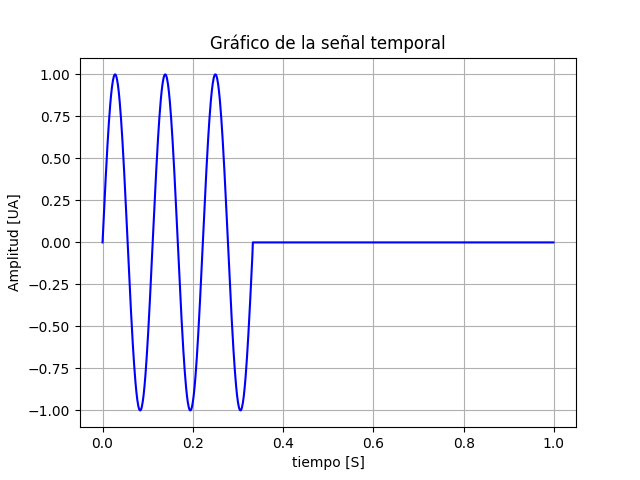

<IPython.core.display.Javascript object>


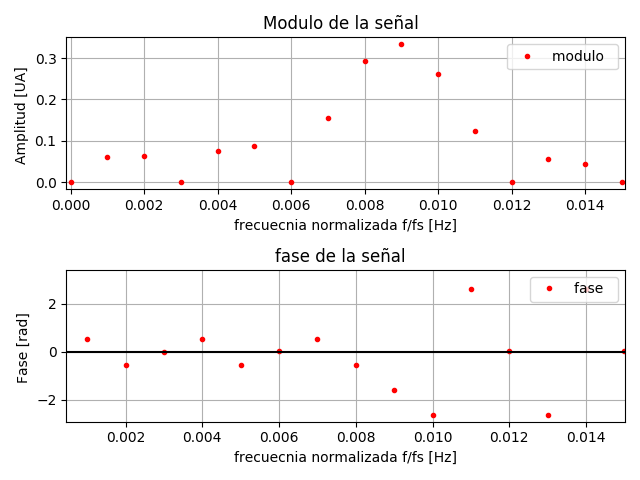

la frecuencia estimada es:  9


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.166,"0,055","0,055"
,,,
simulación,0.166666,0.0555553,0.0555553


In [14]:
#%% importo los paquetes necesarios
%matplotlib notebook
from ipywidgets import interact, fixed

from pandas import DataFrame
from IPython.display import HTML


import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pdsmodulos.signals import signals as sg 
from pdsmodulos.signals import FFT

#%% limpio el entorno
os.system ("clear") # limpia la terminal de python
plt.close("all")    #cierra todos los graficos 

#%% Estalesco los datos necesarios
N  = 1000 # muestras
fs = 1000 # Hz
df = fs / N
a0 = 1 # Volts
p0 = 0 # radianes
f0 = 9*df# Hz

#%% Genero las variables necesarias

signal    = np.zeros(N)
fftsignal = np.zeros(N, complex)

energia_temporal = 0
energia_frecuencia = 0
energia_frecuencia_puntual = 0
energia_max_frecuencia = 0
#%% generacion y muestreo de las senoidal
N0= round((3/f0)*1000)
tt, aux_signal = sg.seno(fs, f0, N0, a0, p0)

aux = np.zeros(N-N0)
signal = np.concatenate((aux_signal, aux), axis=0) 

del tt, aux, aux_signal
tt = np.linspace(0, (N-1)/fs, N)

fftsignal    = np.fft.fft(signal)
mod_fftsignal = np.abs(fftsignal)


#%% Gŕaficos de las señales en tiempo y en frecuenciales
plt.figure("Gráfico de la señal temporal")
plt.plot(tt, signal, 'b')
plt.xlabel('tiempo [S]')
plt.ylabel('Amplitud [UA]')
plt.grid()
plt.title('Gráfico de la señal temporal')


FFT.plotFFT(fftsignal, fs, N, y1l='Amplitud [UA] ', y2l='Fase [rad] ',
              c=0, db='off', tipo='plot', m='.', col_ax='off')
#%%  Cálculo de la energía

# energía temporal
for ii in range(0,N):
     energia_temporal += signal[ii]**2

energia_temporal /= N

#energia frecuencial
for ii in range(0,N):
    energia_frecuencia += mod_fftsignal[ii]**2
     
energia_frecuencia = energia_frecuencia/N**2


# Energía puntual
mod_fftsignal1 = np.zeros(int(N/2))
mod_fftsignal1 = mod_fftsignal[:int(N/2)]

max_signal = np.amax(mod_fftsignal1, axis=0)


for jj in range(0, int(N/2)) :
     if (max_signal == mod_fftsignal1[jj]) :
        k = jj
          
print('la frecuencia estimada es: ', k)


energia_frecuencia_puntual = mod_fftsignal1[9] **2
energia_frecuencia_puntual = energia_frecuencia_puntual *2/(N**2)

energia_max_frecuencia = max_signal **2
energia_max_frecuencia = energia_max_frecuencia *2/(N**2)

#%% Relleno de tabla 
prediccion = ['0.166', '0,055', '0,055']
resultados = [energia_frecuencia, energia_frecuencia_puntual, energia_max_frecuencia]

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [prediccion[0], prediccion[1], prediccion[2]], # <-- completar acá
                  ['', '', ''], 
                  [resultados[0], resultados[1], resultados[2]]  # <-- completar acá
                 ]
df = pd.DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])

HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con la señal donde los 9 ciclos estaban presentes? ¿Y respecto a la que solo había 1 ciclo?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La energía en $f_0$ es la tercera parte de la energía total de la señal, en comparación con la señal de 9 ciclos es la novena parte. Respecto a la señal de un solo ciclo es cerca de 9 veces mayor.
También podemos notar que si graficamos el módulo en db los lóbulos de la sinc() son menores por tener una ventana de muestreo mas ancha.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./7.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.g) Idem anterior, pero cada ciclo con amplitudes (1, 5, 3).</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Esperaría que la forma del módulo de la señal sea similar pero con distintos valores en el pico de la señal. La señal debería tener más energía ya que tiene señales de mayor amplitud. 
</div>

<IPython.core.display.Javascript object>


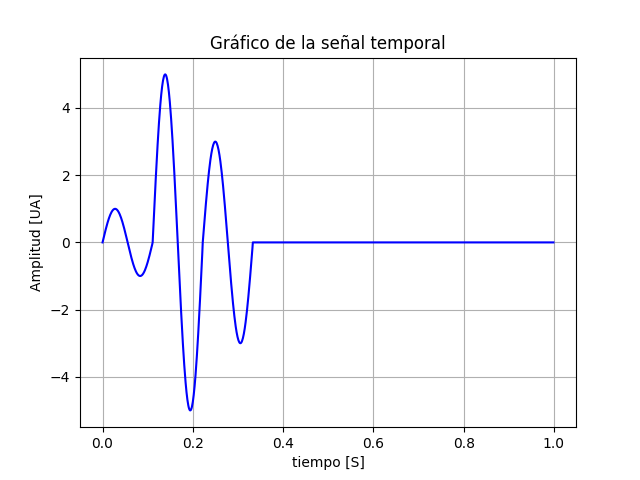

<IPython.core.display.Javascript object>


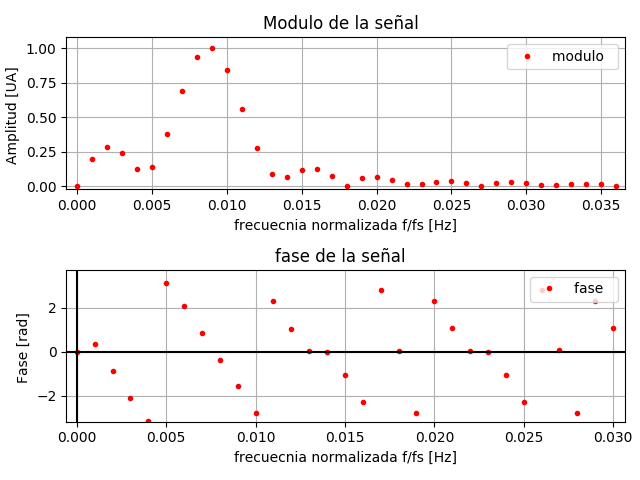

la frecuencia estimada es:  9


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,1.94444,0.499991,0.499991


In [15]:
#%% importo los paquetes necesarios
%matplotlib notebook
from ipywidgets import interact, fixed

from pandas import DataFrame
from IPython.display import HTML

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pdsmodulos.signals import signals as sg 
from pdsmodulos.signals import FFT

#%% limpio el entorno
os.system ("clear") # limpia la terminal de python
plt.close("all")    #cierra todos los graficos 

#%% Estalesco los datos necesarios
N  = 1000 # muestras
fs = 1000 # Hz
df = fs / N
a0 = 1 # Volts
a1 = 5 # Volts
a2 = 3 # Volts
p0 = 0 # radianes
f0 = 9*df# Hz

#%% Genero las variables necesarias

signal    = np.zeros(N)
fftsignal = np.zeros(N, complex)

energia_temporal = 0
energia_frecuencia = 0
energia_frecuencia_puntual = 0
energia_max_frecuencia = 0
#%% generacion y muestreo de las senoidal
N0= round((1/f0)*1000)
tt, aux_signal0 = sg.seno(fs, f0, N0, a0, p0)
tt, aux_signal1 = sg.seno(fs, f0, N0, a1, p0)
tt, aux_signal2 = sg.seno(fs, f0, N0, a2, p0)

aux = np.zeros(2*N0)
aux = np.concatenate((aux_signal0, aux_signal1), axis=0) 
aux2 = np.zeros(3*N0)
aux2 = np.concatenate((aux, aux_signal2), axis=0) 
aux3 = aux = np.zeros(N - 3*N0)
signal = np.concatenate((aux2, aux3), axis=0) 

del tt, aux, aux2, aux3, aux_signal0, aux_signal1, aux_signal2
tt = np.linspace(0, (N-1)/fs, N)

fftsignal    = np.fft.fft(signal)
mod_fftsignal = np.abs(fftsignal)


#%% Gŕaficos de las señales en tiempo y en frecuenciales
plt.figure("Gráfico de la señal temporal")
plt.plot(tt, signal, 'b')
plt.xlabel('tiempo [S]')
plt.ylabel('Amplitud [UA]')
plt.grid()
plt.title('Gráfico de la señal temporal')


FFT.plotFFT(fftsignal, fs, N, y1l='Amplitud [UA] ', y2l='Fase [rad] ',
              c=0, db='off', tipo='plot', m='.', col_ax='off')
#%%  Cálculo de la energía

# energía temporal
for ii in range(0,N):
     energia_temporal += signal[ii]**2

energia_temporal /= N

#energia frecuencial
for ii in range(0,N):
    energia_frecuencia += mod_fftsignal[ii]**2
     
energia_frecuencia = energia_frecuencia/N**2


# Energía puntual
mod_fftsignal1 = np.zeros(int(N/2))
mod_fftsignal1 = mod_fftsignal[:int(N/2)]

max_signal = np.amax(mod_fftsignal1, axis=0)


for jj in range(0, int(N/2)) :
     if (max_signal == mod_fftsignal1[jj]) :
          k = jj
          
print('la frecuencia estimada es: ', k)


energia_frecuencia_puntual = mod_fftsignal1[9] **2
energia_frecuencia_puntual = energia_frecuencia_puntual *2/(N**2)

energia_max_frecuencia = max_signal **2
energia_max_frecuencia = energia_max_frecuencia *2/(N**2)

#%% Relleno de tabla 
prediccion = ['', '', '']
resultados = [energia_frecuencia, energia_frecuencia_puntual, energia_max_frecuencia]

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [prediccion[0], prediccion[1], prediccion[2]], # <-- completar acá
                  ['', '', ''], 
                  [resultados[0], resultados[1], resultados[2]]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])

HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Podemos notar que en $f_0$ hay más energía que en el caso anterior. También se puede notar que en el primer lóbulo este no llega a cero sino que tiene su valor mínimo en aproximadamente 0,2.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./8.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.h) Idem patrón anterior, pero repetido 3 veces.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En este caso esperaría tener 3 veces mas energía que en el caso anterior. Por otro lado también esperaría que la señal no esté interpolada por una señal sinc. También el módulo de la señal debería ser similar al anterior pero con picos mas altos por tener mas energía.
</div>

<IPython.core.display.Javascript object>


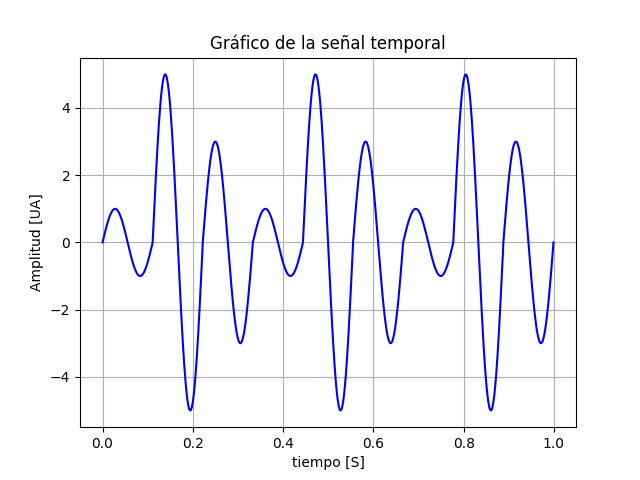

<IPython.core.display.Javascript object>


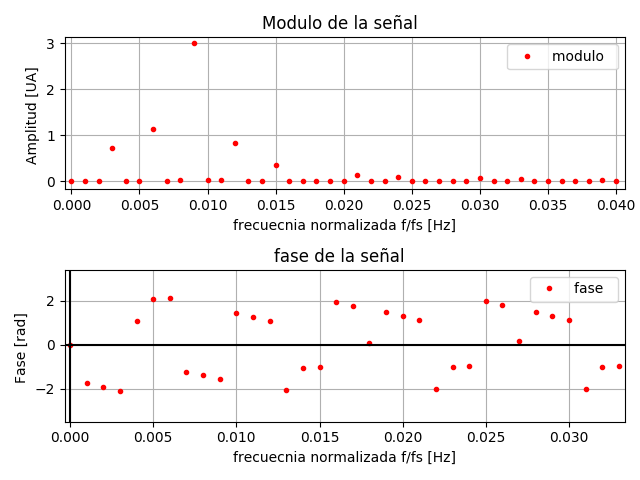

la frecuencia estimada es:  9


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,"5,8333","5,8333","5,8333"
,,,
simulación,5.83332,4.49885,4.49885


In [16]:
#%% importo los paquetes necesarios
%matplotlib notebook
from ipywidgets import interact, fixed

from pandas import DataFrame
from IPython.display import HTML

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pdsmodulos.signals import signals as sg 
from pdsmodulos.signals import FFT

#%% limpio el entorno
os.system ("clear") # limpia la terminal de python
plt.close("all")    #cierra todos los graficos 

#%% Estalesco los datos necesarios
N  = 1000 # muestras
fs = 1000 # Hz
df = fs / N
a0 = 1 # Volts
a1 = 5 # Volts
a2 = 3 # Volts
p0 = 0 # radianes
f0 = 9*df# Hz

#%% Genero las variables necesarias

signal    = np.zeros(N)
fftsignal = np.zeros(N, complex)

energia_temporal = 0
energia_frecuencia = 0
energia_frecuencia_puntual = 0
energia_max_frecuencia = 0


#%% generacion y muestreo de las senoidal
N0= round((1/f0)*1000)
tt, aux_signal0 = sg.seno(fs, f0, N0, a0, p0)
tt, aux_signal1 = sg.seno(fs, f0, N0, a1, p0)
tt, aux_signal2 = sg.seno(fs, f0, N0, a2, p0)

aux = np.zeros(2*N0)
aux = np.concatenate((aux_signal0, aux_signal1), axis=0) 
aux2 = np.zeros(3*N0)
aux2 = np.concatenate((aux, aux_signal2), axis=0) 
aux3 = aux = np.zeros(6*N0)
aux3 = np.concatenate((aux2, aux2), axis=0) 
aux4 = np.concatenate((aux3, aux2), axis=0) 
aux5 = np.zeros((1))
signal = np.concatenate((aux4, aux5), axis=0) 

del tt, aux, aux2, aux3, aux4, aux5, aux_signal0, aux_signal1, aux_signal2
tt = np.linspace(0, (N-1)/fs, N)

fftsignal    = np.fft.fft(signal)
mod_fftsignal = np.abs(fftsignal)


#%% Gŕaficos de las señales en tiempo y en frecuenciales
plt.figure("Gráfico de la señal temporal")
plt.plot(tt, signal, 'b')
plt.xlabel('tiempo [S]')
plt.ylabel('Amplitud [UA]')
plt.grid()
plt.title('Gráfico de la señal temporal')


FFT.plotFFT(fftsignal, fs, N, y1l='Amplitud [UA] ', y2l='Fase [rad] ',
              c=0, db='off', tipo='plot', m='.', col_ax='off')
#%%  Cálculo de la energía

# energía temporal
for ii in range(0,N):
     energia_temporal += signal[ii]**2

energia_temporal /= N

#energia frecuencial
for ii in range(0,N):
    energia_frecuencia += mod_fftsignal[ii]**2
     
energia_frecuencia = energia_frecuencia/N**2


# Energía puntual
mod_fftsignal1 = np.zeros(int(N/2))
mod_fftsignal1 = mod_fftsignal[:int(N/2)]

max_signal = np.amax(mod_fftsignal1, axis=0)


for jj in range(0, int(N/2)) :
     if (max_signal == mod_fftsignal1[jj]) :
        k = jj
          
print('la frecuencia estimada es: ', k)


energia_frecuencia_puntual = mod_fftsignal1[9] **2
energia_frecuencia_puntual = energia_frecuencia_puntual *2/(N**2)

energia_max_frecuencia = max_signal **2
energia_max_frecuencia = energia_max_frecuencia *2/(N**2)

#%% Relleno de tabla 
prediccion = ['5,8333', '5,8333', '5,8333']
resultados = [energia_frecuencia, energia_frecuencia_puntual, energia_max_frecuencia]

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [prediccion[0], prediccion[1], prediccion[2]], # <-- completar acá
                  ['', '', ''], 
                  [resultados[0], resultados[1], resultados[2]]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])

HTML(df.to_html())

¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior? ¿Y respecto al que estaban los 9 ciclos presentes pero con la misma amplitud?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La energía en $f_0$ es 9 veces mayor lo cual es esperable si se tienen en cuenta los experimentos de los puntos a y f, donde en el 4 la señal tiene 9 ciclos y en el f tiene 3 ciclos. En $f_0$ la energía también es 9 veces mas grande que en el inciso a.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./9.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.i) En este caso genere un ciclo de $f_0 = 9 \cdot f_S/N$, y seguido otro ciclo pero desfasado $\pi$ radianes.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

In [21]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  ['', '', ''], # <-- completar acá
                  ['', '', ''], 
                  ['', '', '']  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,,,
,,,
simulación,,,


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el que estaba un solo ciclo presente?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

Luego de realizar la experimentación y observando los resultados obtenidos discuta si es fiable o no medir en el dominio de Fourier, por medio de la FFT los siguientes aspectos de una señal:

    • Energía
    • Contenido espectral
    • Energía de un determinado ancho de banda o componente espectral
    • Localización temporal de un determinado componente espectral.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>5)</b> 
Simule el efecto de cuantizar una señal continua en el tiempo mediante un conversor analógico digital (ADC).
</div>

Para ello analice señales determinísticas, por ejemplo una senoidal de **energía normalizada** y frecuencia $f_0$, y otras que varíen de forma más aleatoria y por lo tanto, representativa de una señal real, por ejemplo añadiendo ruido. Es decir que la señal *real* simulada será 

$$s_R = s + n$$

donde la señal $n$ debe tener una energía de $1/10$.
           
Puede simular una señal continua (aproximadamente para los fines prácticos), mediante una señal muestreada a una $f^1_S$ muy alta en comparación con las $f_S$  que quiere estudiar, y un tipo de dato de doble precisión (double o float de 64 bits). De esta manera se asegura una grilla de cuantización (en tiempo y amplitud) mucho más densa que la que se va a simular. Se pide cuantizar a palabras de 4, 8 y 16 bits, obteniendo

$$ s_Q = \mathop{Q}_i \{s_R\} \quad i \in (4, 8, 16) $$

Siendo $\mathop{Q}_i$ la función **no lineal** responsable de la cuantización a *i-* bits de la señal real $s_R$. Describa el ruido de cuantización 

$$ e = s_Q - s_R$$

para las 3 situaciones antedichas siguiendo las siguientes consignas.
     


<div class="alert alert-block alert-info">
<b>5.a)</b> 
La señal temporal $e$ y su espectro $E$.
</div>

In [22]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$' ], 
                   ['',                                             '',                                             ''                              ], 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía total Q', 'Energía total $e$'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Energía total,Energía total Q,Energía total $e$
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$
,,,
4 bits,,,
8 bits,,,
16 bits,,,


<div class="alert alert-block alert-info">
<b>5.b)</b> El histograma de la señal $e_i$ para cada tamaño de palabra.
</div>

In [23]:
#####################################
# Tu simulación que genere gráficas #
#####################################


¿Qué información podemos obtener de esta forma de analizar la señal $e_i$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>5.c)</b> Una descripción de la señal $e_i$, por medio del **valor medio**, su valor **RMS** y su energía **energía**
</div>

In [24]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Valor medio', 'RMS', 'Energía'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Valor medio,RMS,Energía
4 bits,,,
8 bits,,,
16 bits,,,


<div class="alert alert-block alert-info">
<b>5.d)</b> Una descripción **estadística** de la señal $e_i$, por medio de su **media**, su **desvío estándard** y su energía **varianza**.
</div>

In [25]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Media', 'Desvío estándard', 'Varianza'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Media,Desvío estándard,Varianza
4 bits,,,
8 bits,,,
16 bits,,,


Discutir las similitudes y diferencias con los parámetros calculados en **c)** y **d)**. 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>